# 1 

A partir del fichero "US_Crime_Rates_1960_2014", se pide:

1. Tratar el dataset como una serie temporal a partir de la columna Year. Siempre el eje X será el nuevo índice Year.
2. Crea una red neuronal no convolucional de 3 capas y 32, 32, 64 neuronas respectivamente. Entrénala con los datos desde 1960 hasta 2010. Usa los datos desde 2010 hasta 2014 para predecir la columna "Murder" (y). ¿Se aproxima al número real?
3. Ahora, prueba 3 optimizadores diferentes, ¿se modifica el resultado? ¿cuál te ha dado mejores resultados? 
4. Con el mejor optimizador modifica la función de activación a otra diferente. ¿Cuál ha dado mejor resultado?
5. Ahora, haz que la red tenga 7 capas con 17,9,4,16,4,4,4 neuronas respectivamente. Utiliza la mejor función de activación y el mejor optimizador. ¿Esta red da mejor resultado? (Si da problema de memoria, prueba a quitar capas.)
6. Por último, genera una red convolucional con 2 capas convolucionales sin MaxPool, ¿es mejor esta red que las anteriores? Prueba a cambiar la función de activación y el optimizador. ¿Se ha mejorado el resultado? ¿Cuál es mejor?
7. ¿Qué crees que pasaría si entrenamos la red hasta el año 2000 y predecimos desde el 2000 hasta el 2014? (Bonus: realiza el mismo proceso de los ejercicios 2-6 pero entrenando solo hasta el año 2000)

In [1]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)


2.3.1


In [2]:
df = pd.read_csv("US_Crime_Rates_1960_2014.csv")

In [3]:
df.set_index("Year", inplace=True)


&lt;matplotlib.axes._subplots.AxesSubplot at 0x7fea730335b0&gt;

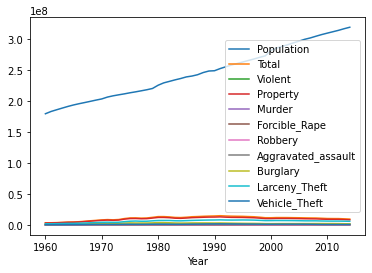

In [4]:
df.plot()

In [5]:
df.info()

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
Int64Index: 55 entries, 1960 to 2014
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Population          55 non-null     int64
 1   Total               55 non-null     int64
 2   Violent             55 non-null     int64
 3   Property            55 non-null     int64
 4   Murder              55 non-null     int64
 5   Forcible_Rape       55 non-null     int64
 6   Robbery             55 non-null     int64
 7   Aggravated_assault  55 non-null     int64
 8   Burglary            55 non-null     int64
 9   Larceny_Theft       55 non-null     int64
 10  Vehicle_Theft       55 non-null     int64
dtypes: int64(11)
memory usage: 5.2 KB


In [6]:
df.index

Int64Index([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
            1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
            1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
            1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
            2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014],
           dtype=&#39;int64&#39;, name=&#39;Year&#39;)

In [7]:
df.head()

,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,,
1960,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1961,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
1962,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
1963,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
1964,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800


In [8]:
#sns.pairplot(df)

In [9]:
df_crime =df

In [10]:
#df_crime.drop(columns=["Total"], axis=1,inplace=True)

In [11]:
df_crime.info()

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
Int64Index: 55 entries, 1960 to 2014
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Population          55 non-null     int64
 1   Total               55 non-null     int64
 2   Violent             55 non-null     int64
 3   Property            55 non-null     int64
 4   Murder              55 non-null     int64
 5   Forcible_Rape       55 non-null     int64
 6   Robbery             55 non-null     int64
 7   Aggravated_assault  55 non-null     int64
 8   Burglary            55 non-null     int64
 9   Larceny_Theft       55 non-null     int64
 10  Vehicle_Theft       55 non-null     int64
dtypes: int64(11)
memory usage: 5.2 KB


In [12]:
train_dataset = df_crime[df_crime.index<=2010]
test_dataset = df_crime[df_crime.index>2010]

In [13]:
train_dataset.shape, test_dataset.shape

((51, 11), (4, 11))

In [14]:
# Murder  = Variable a predecir (target)
train_labels = train_dataset.pop('Murder')
test_labels = test_dataset.pop('Murder')

In [15]:
train_dataset.shape, train_labels.shape, test_dataset.shape, test_labels.shape


((51, 10), (51,), (4, 10), (4,))

Crea una red neuronal no convolucional de 3 capas y 32, 32, 64 neuronas respectivamente. Entrénala con los datos desde 1960 hasta 2010. Usa los datos desde 2010 hasta 2014 para predecir la columna "Murder" (y). ¿Se aproxima al número real?


Ahora, prueba 3 optimizadores diferentes, ¿se modifica el resultado? ¿cuál te ha dado mejores resultados?
Con el mejor optimizador modifica la función de activación a otra diferente. ¿Cuál ha dado mejor resultado?

In [88]:
# Dos Capas con 64 neuronas cada una. La capa de salida tiene un solo valor (corresponde al Murder a predecir)
def build_model():
  model = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(32, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='tanh')
  ])

  optimizer1 = tf.keras.optimizers.RMSprop(0.001)
  optimizer2 = "adam"
  optimizer3 = "SGD"
  optimizer4 = "Adadelta"

  model.compile(loss='mse',
                optimizer=optimizer2,
                metrics=['mae', 'mse'])
  return model

In [89]:
model = build_model()

In [90]:
# Revisión del modelo
model.summary()

Model: &quot;sequential_5&quot;
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 32)                352       
_________________________________________________________________
dense_21 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_22 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 65        
Total params: 3,585
Trainable params: 3,585
Non-trainable params: 0
_________________________________________________________________


In [33]:
# ESTA PARTICION DEL CONJUNTO DE ENTRENAMIENTO LA HIZO CLARA EN EL EJEMPLO
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_dataset, train_labels, test_size= 0.20, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((40, 10), (11, 10), (40,), (11,))

In [91]:
### Entrenamiento del modelo (epochs). Se registra la precisión del modelo en el objeto history
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    print('ñ', end='')


In [92]:
EPOCHS = 200
# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

#Si lo quiero entrenar con todos los datos hasta el 2009
history = model.fit(train_dataset, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

#Para ajustar el entrenar el  modelo con la partición (split) que hicimos del conjunto de train
#history = model.fit(X_train, y_train, epochs=EPOCHS,
#                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])



ñññññññññññ

In [93]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
6,343866144.0,17913.824219,343866144.0,261845248.0,16168.272461,261845248.0,6
7,343866176.0,17913.824219,343866176.0,261845248.0,16168.272461,261845248.0,7
8,343866144.0,17913.824219,343866144.0,261845248.0,16168.272461,261845248.0,8
9,343866144.0,17913.824219,343866144.0,261845248.0,16168.272461,261845248.0,9
10,343866112.0,17913.824219,343866112.0,261845248.0,16168.272461,261845248.0,10


In [94]:
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} Murder".format(mae))

1/1 - 0s - loss: 211031712.0000 - mae: 14524.7500 - mse: 211031712.0000
Testing set Mean Abs Error: 14524.75 Murder


In [24]:
#df_resultado = pd.DataFrame({'optim':["rmseprom"], 'capas': ["32 32 64 1"],'activ': ["linear"] ,'epoch': [200], 'loss': [loss], 'mae': [mae], 'mse' :[mse]})

In [95]:
df_resultado=df_resultado.append({'optim' : 'Adam' , 'capas' : "32 32 64 1", 'activ' : 'tanh', 'epoch':200, 'loss': loss, 'mae': mae, 'mse' :mse}, ignore_index=True)

In [96]:
test_dataset

,Population,Total,Violent,Property,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,
2011,311587816,10258774,1206031,9052743,84175,354772,752423,2185140,6151095,716508
2012,313873685,10219059,1217067,9001992,85141,355051,762009,2109932,6168874,723186
2013,316497531,9850445,1199684,8650761,82109,345095,726575,1931835,6018632,700294
2014,318857056,9475816,1197987,8277829,84041,325802,741291,1729806,5858496,689527


In [97]:
df_resultado

,optim,capas,activ,epoch,loss,mae,mse
0,rmseprom,32 32 64 1,linear,200,3.975728e+12,1993823.750,3.975728e+12
1,adam,32 32 64 1,linear,200,1.545115e+12,1236794.875,1.545115e+12
2,SGD,32 32 64 1,linear,200,NaN,NaN,NaN
3,Adadelta,32 32 64 1,linear,200,5.007401e+12,2236988.500,5.007401e+12
4,Adam,32 32 64 1,sigmoid,200,2.109736e+08,14522.750,2.109736e+08
5,Adam,32 32 64 1,tanh,200,2.110317e+08,14524.750,2.110317e+08


### `EN NINGUN CASO LOS RESULTADOS SE APROXIMAN AL NUMERO REAL`

(14218.15, 14896.85, -1.0550000000000002, 677.6450000000008)

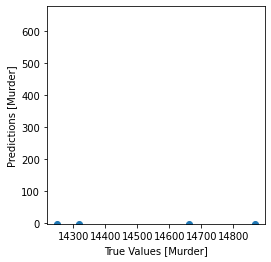

In [98]:
test_predictions = model.predict(test_dataset).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Murder]')
plt.ylabel('Predictions [Murder]')
plt.axis('equal')
plt.axis('square')


In [99]:
test_labels, test_predictions

(Year
 2011    14661
 2012    14866
 2013    14319
 2014    14249
 Name: Murder, dtype: int64,
 array([-1., -1., -1., -1.], dtype=float32))

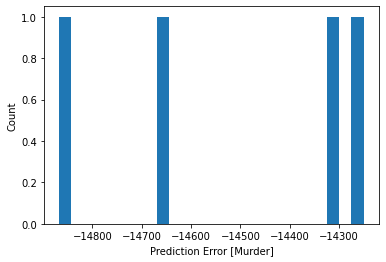

In [100]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [Murder]")
_ = plt.ylabel("Count")

### ==========================================================================================

In [ ]:
Ahora, haz que la red tenga 7 capas con 17,9,4,16,4,4,4 neuronas respectivamente. Utiliza la mejor función de activación y el mejor optimizador. ¿Esta red da mejor resultado? (Si da problema de memoria, prueba a quitar capas.)

In [102]:

def build_model():
  model = keras.Sequential([
    layers.Dense(17, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(9, activation='relu'),
    layers.Dense(4, activation='relu'),
    layers.Dense(16, activation='relu'), 
    layers.Dense(4, activation='relu'), 
    layers.Dense(4, activation='relu'), 
    layers.Dense(4, activation='relu'), 
    layers.Dense(1, activation='linear')
  ])

  # Prueba con distintos optimizadores ("rmseprom", "adam", "SGD", "Adadelta")  
  optimizer = tf.keras.optimizers.RMSprop(0.001)
  optimizer2 = "adam"

  model.compile(loss='mse',
                optimizer=optimizer2,
                metrics=['mae', 'mse'])
  return model

In [103]:
model = build_model()
model.summary()

Model: &quot;sequential_6&quot;
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 17)                187       
_________________________________________________________________
dense_25 (Dense)             (None, 9)                 162       
_________________________________________________________________
dense_26 (Dense)             (None, 4)                 40        
_________________________________________________________________
dense_27 (Dense)             (None, 16)                80        
_________________________________________________________________
dense_28 (Dense)             (None, 4)                 68        
_________________________________________________________________
dense_29 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_30 (Dense)             (None, 4)      

In [104]:
EPOCHS = 200
# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

#Si lo quiero entrenar con todos los datos hasta el 2009
history = model.fit(train_dataset, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

#Para ajustar el entrenar el  modelo con la partición (split) que hicimos del conjunto de train
#history = model.fit(X_train, y_train, epochs=EPOCHS,
#                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])


ññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññ

In [105]:
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} Murder".format(mae))

1/1 - 0s - loss: 209992256.0000 - mae: 14488.9238 - mse: 209992256.0000
Testing set Mean Abs Error: 14488.92 Murder


In [106]:
df_resultado = df_resultado.append({'optim' : 'adam' , 'capas' : "17,9,4,16,4,4,4,1", 'activ' : 'linear', 'epoch':200, 'loss': loss, 'mae': mae, 'mse' :mse}, ignore_index=True)

In [107]:
df_resultado

,optim,capas,activ,epoch,loss,mae,mse
0,rmseprom,32 32 64 1,linear,200,3.975728e+12,1.993824e+06,3.975728e+12
1,adam,32 32 64 1,linear,200,1.545115e+12,1.236795e+06,1.545115e+12
2,SGD,32 32 64 1,linear,200,NaN,NaN,NaN
3,Adadelta,32 32 64 1,linear,200,5.007401e+12,2.236988e+06,5.007401e+12
4,Adam,32 32 64 1,sigmoid,200,2.109736e+08,1.452275e+04,2.109736e+08
5,Adam,32 32 64 1,tanh,200,2.110317e+08,1.452475e+04,2.110317e+08
6,adam,"17,9,4,16,4,4,4,1",linear,200,2.099923e+08,1.448892e+04,2.099923e+08


### `Esta red (con más capas) da mejores resultados (aunque siguen siendo muy malos)`

Por último, genera una red convolucional con 2 capas convolucionales sin MaxPool, ¿es mejor esta red que las anteriores? Prueba a cambiar la función de activación y el optimizador. ¿Se ha mejorado el resultado? ¿Cuál es mejor?

In [116]:

def build_model():
    model = keras.Sequential()
    model.add(keras.layers.Conv2D(filters=8, kernel_size=(3, 3), strides=(1, 1), activation="relu", padding="valid", input_shape=?????
    model.add(keras.layers.Conv2D(filters=8, kernel_size=(3, 3), strides=(1, 1), activation="relu", padding="valid", input_shape=?????
    model.add(keras.layers.Dense(1, activation='linear'))

  # Prueba con distintos optimizadores ("rmseprom", "adam", "SGD", "Adadelta")  
    optimizer = tf.keras.optimizers.RMSprop(0.001)
    optimizer2 = "adam"

    model.compile(loss='mse',
                optimizer=optimizer2,
                metrics=['mae', 'mse'])
    return model

In [117]:
model = build_model()
model.summary()

ValueError: Input 0 of layer conv2d is incompatible with the layer: : expected min_ndim=4, found ndim=2. Full shape received: [None, 10]

### `NO SE QUE PONER EN LA INPUT SHAPE`